In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




```
# This is formatted as code
```

# 1. Load Data

In [59]:
train = pd.read_csv("/content/drive/MyDrive/Projects/Natural Disaster Tweets/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Projects/Natural Disaster Tweets/test.csv")

display(train.head())
print(len(train))
display(test.head())
print(len(test))

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


7613


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


3263


## Data Distribution

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'distribution')

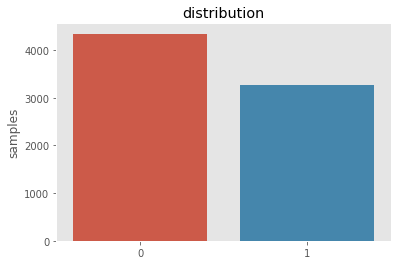

In [60]:
x = train["target"].value_counts()
plt.grid()
sns.barplot(x.index, x)
plt.gca().set_ylabel("samples")
plt.title("distribution")

Text(0.5, 1.0, 'Disaster tweets length')

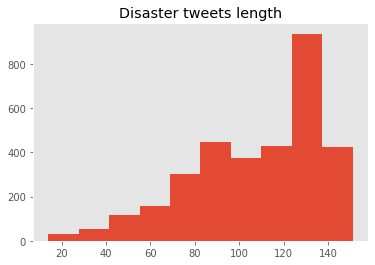

In [61]:
plt.grid()

plt.hist(train[train["target"] == 1]["text"].str.len())
plt.title("Disaster tweets length")

Text(0.5, 1.0, 'No disaster tweets length')

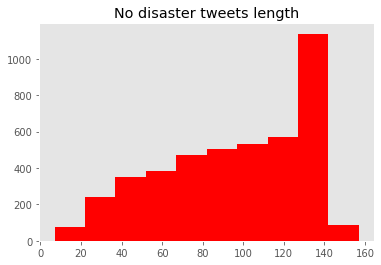

In [62]:
plt.grid()

plt.hist(train[train["target"] == 0]["text"].str.len(), color= 'r')
plt.title("No disaster tweets length")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Disaster tweets length')

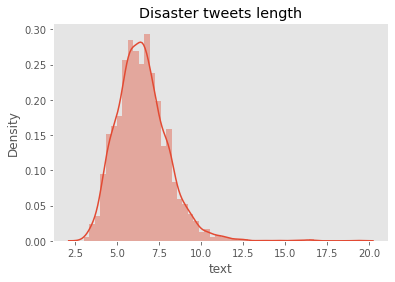

In [63]:
plt.grid()

word1 = train[train["target"] == 1]["text"].str.split().apply(lambda x:[len(i) for i in x])
sns.distplot(word1.map(lambda x: np.mean(x)))
plt.title("Disaster tweets length")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Disaster tweets length')

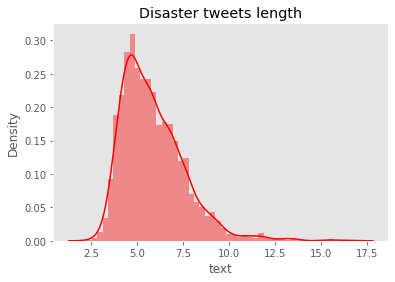

In [64]:
plt.grid()

word1 = train[train["target"] == 0]["text"].str.split().apply(lambda x:[len(i) for i in x])
sns.distplot(word1.map(lambda x: np.mean(x)), color = 'r')
plt.title("Disaster tweets length")

# 2. Create corpus

In [65]:
def create_corpus(target):
    corpus = []
    for x in train[train["target"] == target]["text"].str.split():
        print(x)
        for i in x:
            corpus.append(i)
            
    return corpus

In [66]:
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.util import ngrams

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
corpus = create_corpus(0)

stop = set(stopwords.words("english"))

dictionary = defaultdict(int)
for word in corpus:
    if word in stop:
        dictionary[word] +=1
        
top = sorted(dictionary.items(), key = lambda x:x[1], reverse=True)[:10]

["What's", 'up', 'man?']
['I', 'love', 'fruits']
['Summer', 'is', 'lovely']
['My', 'car', 'is', 'so', 'fast']
['What', 'a', 'goooooooaaaaaal!!!!!!']
['this', 'is', 'ridiculous....']
['London', 'is', 'cool', ';)']
['Love', 'skiing']
['What', 'a', 'wonderful', 'day!']
['LOOOOOOL']
['No', 'way...I', "can't", 'eat', 'that', 'shit']
['Was', 'in', 'NYC', 'last', 'week!']
['Love', 'my', 'girlfriend']
['Cooool', ':)']
['Do', 'you', 'like', 'pasta?']
['The', 'end!']
['We', 'always', 'try', 'to', 'bring', 'the', 'heavy.', '#metal', '#RT', 'http://t.co/YAo1e0xngw']
['Crying', 'out', 'for', 'more!', 'Set', 'me', 'ablaze']
['On', 'plus', 'side', 'LOOK', 'AT', 'THE', 'SKY', 'LAST', 'NIGHT', 'IT', 'WAS', 'ABLAZE', 'http://t.co/qqsmshaJ3N']
['@PhDSquares', '#mufc', "they've", 'built', 'so', 'much', 'hype', 'around', 'new', 'acquisitions', 'but', 'I', 'doubt', 'they', 'will', 'set', 'the', 'EPL', 'ablaze', 'this', 'season.']
['Ablaze', 'for', 'you', 'Lord', ':D']
['Check', 'these', 'out:', 'http://t.co

Text(0.5, 1.0, 'top words 0')

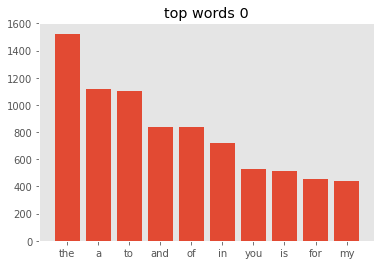

In [68]:
x, y = zip(*top)

plt.grid()
plt.bar(x,y)
plt.title("top words 0")

In [69]:
corpus = create_corpus(1)

stop = set(stopwords.words("english"))

dictionary = defaultdict(int)
for word in corpus:
    if word in stop:
        dictionary[word] +=1
        
top = sorted(dictionary.items(), key = lambda x:x[1], reverse=True)[:10]

['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all']
['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask.', 'Canada']
['All', 'residents', 'asked', 'to', "'shelter", 'in', "place'", 'are', 'being', 'notified', 'by', 'officers.', 'No', 'other', 'evacuation', 'or', 'shelter', 'in', 'place', 'orders', 'are', 'expected']
['13,000', 'people', 'receive', '#wildfires', 'evacuation', 'orders', 'in', 'California']
['Just', 'got', 'sent', 'this', 'photo', 'from', 'Ruby', '#Alaska', 'as', 'smoke', 'from', '#wildfires', 'pours', 'into', 'a', 'school']
['#RockyFire', 'Update', '=>', 'California', 'Hwy.', '20', 'closed', 'in', 'both', 'directions', 'due', 'to', 'Lake', 'County', 'fire', '-', '#CAfire', '#wildfires']
['#flood', '#disaster', 'Heavy', 'rain', 'causes', 'flash', 'flooding', 'of', 'streets', 'in', 'Manitou,', 'Colorado', 'Springs', 'areas']
["I'm", 'on', 'top', 'of', 'the', 'hill', 'and', 'I', 'can', 'see', 'a', 'fire', 'in', 'the', 'w

Text(0.5, 1.0, 'top words 1')

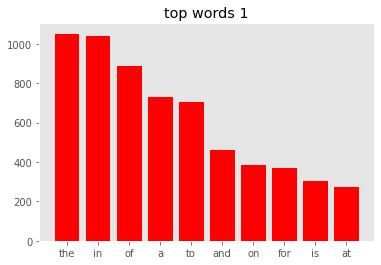

In [70]:
x, y = zip(*top)

plt.grid()
plt.bar(x,y, color = 'r')
plt.title("top words 1")

### Punctuation

In [71]:
corpus = create_corpus(1)

dictionary = defaultdict(int)

import string

special_char = string.punctuation

for i in corpus:
    if i in special_char:
        dictionary[i] +=1
        
        


['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all']
['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask.', 'Canada']
['All', 'residents', 'asked', 'to', "'shelter", 'in', "place'", 'are', 'being', 'notified', 'by', 'officers.', 'No', 'other', 'evacuation', 'or', 'shelter', 'in', 'place', 'orders', 'are', 'expected']
['13,000', 'people', 'receive', '#wildfires', 'evacuation', 'orders', 'in', 'California']
['Just', 'got', 'sent', 'this', 'photo', 'from', 'Ruby', '#Alaska', 'as', 'smoke', 'from', '#wildfires', 'pours', 'into', 'a', 'school']
['#RockyFire', 'Update', '=>', 'California', 'Hwy.', '20', 'closed', 'in', 'both', 'directions', 'due', 'to', 'Lake', 'County', 'fire', '-', '#CAfire', '#wildfires']
['#flood', '#disaster', 'Heavy', 'rain', 'causes', 'flash', 'flooding', 'of', 'streets', 'in', 'Manitou,', 'Colorado', 'Springs', 'areas']
["I'm", 'on', 'top', 'of', 'the', 'hill', 'and', 'I', 'can', 'see', 'a', 'fire', 'in', 'the', 'w

Text(0.5, 1.0, 'Punctuation disaster 1')

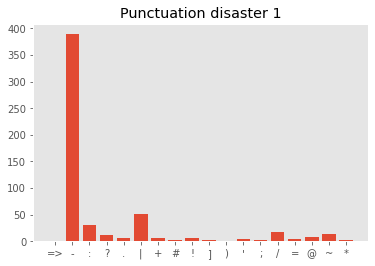

In [72]:
x,y = zip(*dictionary.items())

plt.grid()
plt.bar(x,y)
plt.title("Punctuation disaster 1")

In [73]:
corpus = create_corpus(0)

dictionary = defaultdict(int)

import string

special_char = string.punctuation

for i in corpus:
    if i in special_char:
        dictionary[i] +=1

["What's", 'up', 'man?']
['I', 'love', 'fruits']
['Summer', 'is', 'lovely']
['My', 'car', 'is', 'so', 'fast']
['What', 'a', 'goooooooaaaaaal!!!!!!']
['this', 'is', 'ridiculous....']
['London', 'is', 'cool', ';)']
['Love', 'skiing']
['What', 'a', 'wonderful', 'day!']
['LOOOOOOL']
['No', 'way...I', "can't", 'eat', 'that', 'shit']
['Was', 'in', 'NYC', 'last', 'week!']
['Love', 'my', 'girlfriend']
['Cooool', ':)']
['Do', 'you', 'like', 'pasta?']
['The', 'end!']
['We', 'always', 'try', 'to', 'bring', 'the', 'heavy.', '#metal', '#RT', 'http://t.co/YAo1e0xngw']
['Crying', 'out', 'for', 'more!', 'Set', 'me', 'ablaze']
['On', 'plus', 'side', 'LOOK', 'AT', 'THE', 'SKY', 'LAST', 'NIGHT', 'IT', 'WAS', 'ABLAZE', 'http://t.co/qqsmshaJ3N']
['@PhDSquares', '#mufc', "they've", 'built', 'so', 'much', 'hype', 'around', 'new', 'acquisitions', 'but', 'I', 'doubt', 'they', 'will', 'set', 'the', 'EPL', 'ablaze', 'this', 'season.']
['Ablaze', 'for', 'you', 'Lord', ':D']
['Check', 'these', 'out:', 'http://t.co

Text(0.5, 1.0, 'Punctuation disaster 0')

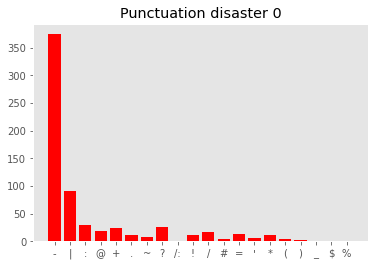

In [74]:
x,y = zip(*dictionary.items())

plt.grid()
plt.bar(x,y, color = 'r')
plt.title("Punctuation disaster 0")

## Common words

In [75]:
from collections import Counter

In [76]:
counter = Counter(corpus)
most = counter.most_common()
x = []
y = []

for word, count in most[:40]:
    if word not in stop:
        x.append(word)
        y.append(count)

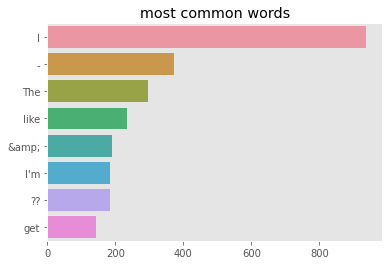

In [77]:
plt.title("most common words")
plt.grid()
sns.barplot(x = y, y = x)

# Data cleaning

In [78]:
df = pd.concat([train, test])
df.shape

(10876, 5)

In [79]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN


## removing URLs

In [80]:
import re

In [81]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [82]:
df["text"] = df["text"].apply(lambda x: remove_url(x))

In [83]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN
3260,10868,NaN,NaN,Green Line derailment in Chicago,NaN
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO),NaN


## remove html tag

In [84]:
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

In [85]:
df["text"] = df["text"].apply(lambda x: remove_html(x))

In [86]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN
3260,10868,NaN,NaN,Green Line derailment in Chicago,NaN
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO),NaN


## Remove emoji

In [87]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" #emoticons
                               u"\U0001F300-\U0001F5FF" #symbols&pics
                               u"\U0001F680-\U0001F6FF" #transportation pic
                               u"\U0001F1E0-\U0001F1FF" #flags
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"    
                               "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [88]:
df["text"] = df["text"].apply(lambda x: remove_emoji(x))

In [89]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN
3260,10868,NaN,NaN,Green Line derailment in Chicago,NaN
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO),NaN


## Remove punctuation

In [90]:
def remove_punctuation(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [91]:
df["text"] = df["text"].apply(lambda x: remove_punctuation(x))

In [92]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1.0
2,5,NaN,NaN,All residents asked to shelter in place are be...,1.0
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1.0
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1.0
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
3259,10865,NaN,NaN,Storm in RI worse than last hurricane My citya...,NaN
3260,10868,NaN,NaN,Green Line derailment in Chicago,NaN
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook HWO,NaN


## Spelling checker

Additional: spelling checker for indonesian dataset

In [93]:
!pip install pyspellchecker

In [94]:
from spellchecker import SpellChecker

In [95]:
spell = SpellChecker()

def correct_spellings(text):
    corrected_text = []
    
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [96]:
#df['text']=df['text'].apply(lambda x : correct_spellings(x))

# Glove vectorization (word2vec)

In [97]:
from tqdm import tqdm
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [98]:
def create_corpus(df):
    corpus = []
    for tweet in tqdm(df["text"]):
        words = [word.lower() for word in word_tokenize(tweet) if \
        ((word.isalpha() == 1) & (word not in stop))]
        corpus.append(words)
        
    return corpus

In [99]:
corpus = create_corpus(df)

100%|██████████| 10876/10876 [00:01<00:00, 8647.25it/s]


In [100]:
embedding_dict = {}

with open('/content/drive/MyDrive/Projects/Natural Disaster Tweets/glove.6B.100d.txt','r') as glove:
    for line in glove:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding_dict[word] = vectors
        
glove.close()

In [101]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D, Dropout
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [102]:
MAX_LEN = 50
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(corpus)

sequences = tokenizer_obj.texts_to_sequences(corpus)

tweet_pad = pad_sequences(sequences,
                          maxlen = MAX_LEN, 
                         truncating = 'post', 
                         padding = 'post')

In [103]:
word_index = tokenizer_obj.word_index
print('number of unique words: ', len(word_index))

number of unique words:  20342


In [104]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words,100))


for word, i in tqdm(word_index.items()):
    if i > num_words:
        continue
        
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 20342/20342 [00:00<00:00, 556127.55it/s]


In [105]:
from keras import regularizers

model = Sequential()

glove_embedding = Embedding(num_words, 100, embeddings_initializer = Constant(embedding_matrix), 
                     input_length = MAX_LEN, 
                     trainable = False)

model.add(glove_embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(256, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

optimizer = Adam(learning_rate=1e-5)

model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ["accuracy"])

In [106]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           2034300   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [107]:
train_data = tweet_pad[:train.shape[0]]
test_data = tweet_pad[train.shape[0]:]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train["target"].values, test_size = 0.20)

In [109]:
hist = model.fit(X_train, y_train, batch_size = 64, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
96/96 [==============================] - 21s 196ms/step - loss: 0.7556 - accuracy: 0.5522 - val_loss: 0.7539 - val_accuracy: 0.5831
Epoch 2/20
96/96 [==============================] - 19s 202ms/step - loss: 0.7536 - accuracy: 0.5717 - val_loss: 0.7518 - val_accuracy: 0.5831
Epoch 3/20
96/96 [==============================] - 20s 204ms/step - loss: 0.7515 - accuracy: 0.5727 - val_loss: 0.7484 - val_accuracy: 0.5831
Epoch 4/20
96/96 [==============================] - 19s 194ms/step - loss: 0.7460 - accuracy: 0.5624 - val_loss: 0.6979 - val_accuracy: 0.6842
Epoch 5/20
96/96 [==============================] - 19s 199ms/step - loss: 0.6708 - accuracy: 0.7121 - val_loss: 0.6144 - val_accuracy: 0.7557
Epoch 6/20
96/96 [==============================] - 19s 193ms/step - loss: 0.6050 - accuracy: 0.7643 - val_loss: 0.5832 - val_accuracy: 0.7636
Epoch 7/20
96/96 [==============================] - 18s 187ms/step - loss: 0.5786 - accuracy: 0.7604 - val_loss: 0.5711 - val_accuracy: 0.7630

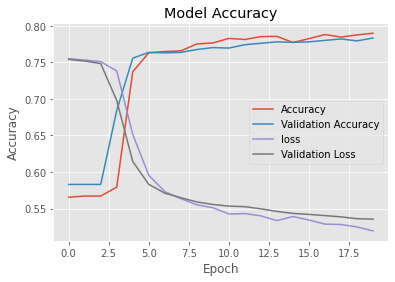

In [110]:
#Ploting Acuracy & Loss
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()